# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren gleichzeitig

In [ ]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial
from script.eval import Plots_for
from script.Verification import verification

In [ ]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 10
batch_size = 10

number_of_adversarial_samples = 10000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [ ]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float32)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


In [ ]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


In [ ]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


In [25]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, hyper_lambda=hyper_lambda)


=== Epoch: 0===
batch = 0, mean loss = 13.831831932067871, l_pos = 0.7480581998825073, l_neg = 0.0, l_gen = 13.083773612976074
batch = 100, mean loss = 9.052698522511095, l_pos = 0.7483850463782207, l_neg = 0.0, l_gen = 8.30431345193693
batch = 200, mean loss = 5.968631693972877, l_pos = 0.742545255084536, l_neg = 0.0, l_gen = 5.22608643236445
batch = 223, mean loss = 5.530901705203035, l_pos = 0.7414765879177726, l_neg = 0.0, l_gen = 4.789425112340482
=== Epoch: 1===
batch = 0, mean loss = 1.3461265563964844, l_pos = 0.7357073426246643, l_neg = 0.0, l_gen = 0.6104191541671753
batch = 100, mean loss = 1.202391516454149, l_pos = 0.7143084141287473, l_neg = 0.0, l_gen = 0.4880830999648217
batch = 200, mean loss = 1.0807197043551735, l_pos = 0.7061041273287872, l_neg = 0.0, l_gen = 0.37461557702638615
batch = 223, mean loss = 1.0651967071096993, l_pos = 0.7059306178926887, l_neg = 0.0, l_gen = 0.3592660894174747
=== Epoch: 2===
batch = 0, mean loss = 0.8500007390975952, l_pos = 0.69429272

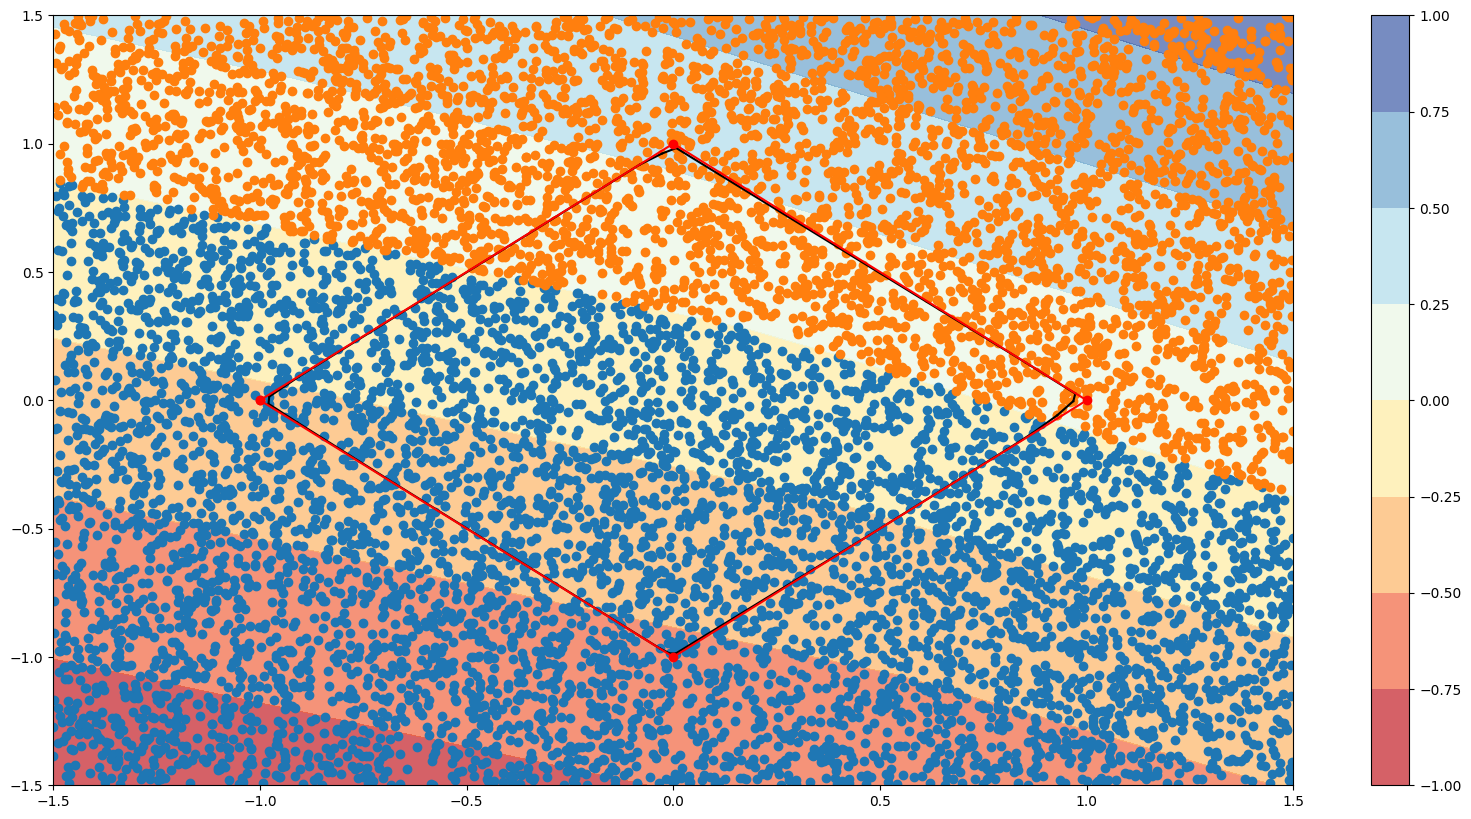

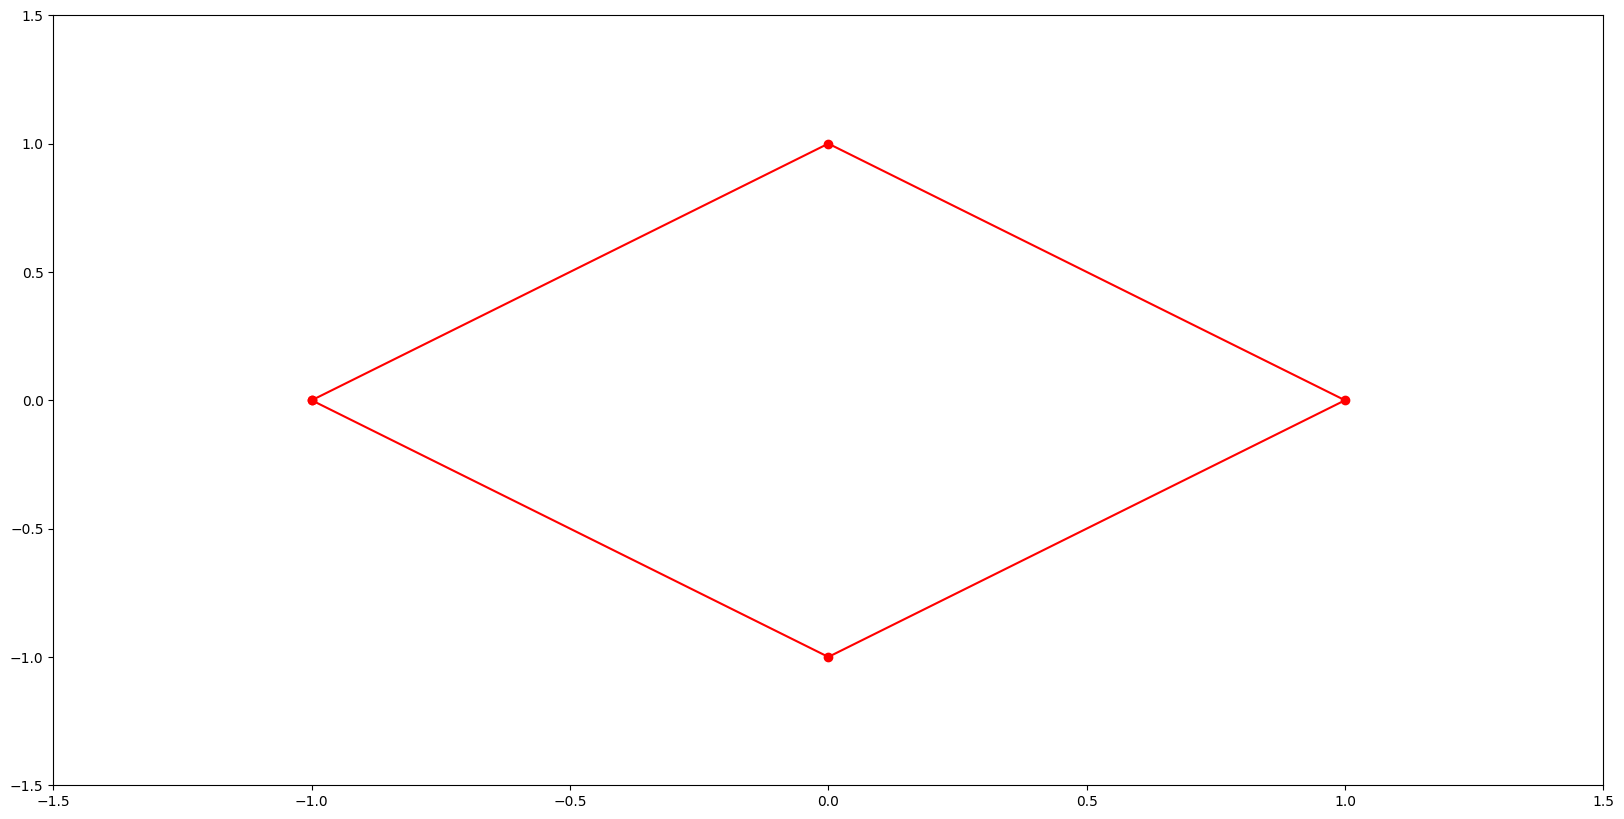

In [26]:
plots.plt_mesh()
plots.plt_adversarial_dotted()

In [27]:
result = verification(icnn, sequential=False)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 348 nonzeros
Model fingerprint: 0x413c6fd7
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [6e-04, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [5e-02, 1e+01]
Found heuristic solution: objective -0.1422013
Presolve removed 87 rows and 58 columns
Presolve time: 0.00s
Presolved: 51 rows, 38 columns, 156 nonzeros
Variable types: 28 continuous, 10 integer (10 binary)

Root relaxation: objective 3.615028e-01, 28 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.36150    0 

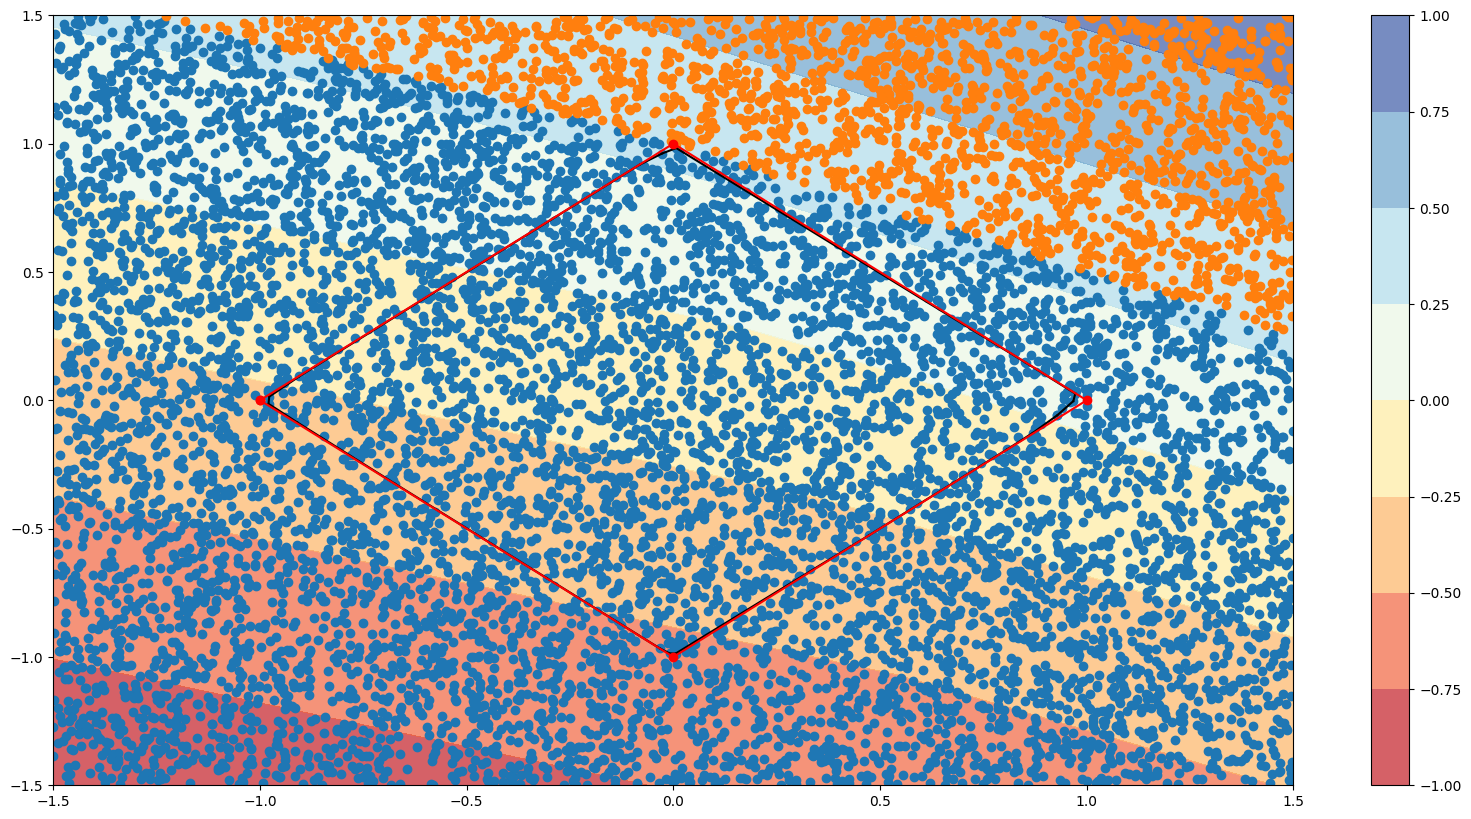

In [28]:
plots.c = result
plots.plt_mesh()